## **Previsão de Demanda para os Próximos 3 Meses utilizando a Regressão linear**

In [ ]:
# Importa as bibliotecas necessárias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import files

In [ ]:
# Carrega os dados do arquivo Excel

uploaded = files.upload()
atendimento = pd.read_excel('base_contatos_SAC.xlsx')

Saving base_contatos_SAC.xlsx to base_contatos_SAC.xlsx


In [ ]:
# Explorar e limpar os dados

atendimento.head(10)

,id_contato,dt_contato,ds_fila_contato,dthr_inicio_fila,dthr_fim_fila,dthr_inicio_atendimento,dthr_fim_atendimento,ds_agente_atendimento,ds_motivo1_contato
0,00B903598457FC82,2024-01-01 07:49:17,Recepção do Pacto,2024-01-01 07:49:17,2024-01-01 07:49:17,2024-01-01 07:49:18,2024-01-01 07:50:46,Agente 121,NaN
1,00B903598457FC91,2024-01-01 08:31:46,Recepção do Pacto,2024-01-01 08:31:46,2024-01-01 08:31:46,2024-01-01 08:31:47,2024-01-01 08:34:35,Agente 68,NaN
2,00B903598457FC92,2024-01-01 08:33:02,Recepção do Pacto,2024-01-01 08:33:02,2024-01-01 08:33:01,2024-01-01 08:33:02,2024-01-01 08:36:45,Agente 121,Contagem de Tesouro
3,00B903598457FCAE,2024-01-01 09:24:11,Recepção do Pacto,2024-01-01 09:24:11,2024-01-01 09:24:11,2024-01-01 09:24:12,2024-01-01 09:27:59,Agente 216,Emissão do Símbolo
4,00B903598457FCC8,2024-01-01 09:56:11,Recepção do Pacto,2024-01-01 09:56:11,2024-01-01 09:56:11,2024-01-01 09:56:11,2024-01-01 09:57:38,Agente 216,Contagem de Tesouro
5,00B903598457FCD3,2024-01-01 09:59:59,Diversos do Tesouro,2024-01-01 09:59:59,2024-01-01 09:59:59,2024-01-01 10:00:00,2024-01-01 10:05:49,Agente 121,Oferta ao Cofre
6,00B903598457FCDA,2024-01-01 10:09:48,Recepção do Pacto,2024-01-01 10:09:48,2024-01-01 10:09:48,2024-01-01 10:09:48,2024-01-01 10:13:53,Agente 68,Oferta ao Cofre
7,00B903598457FD07,2024-01-01 10:38:47,Recepção do Pacto,2024-01-01 10:38:47,2024-01-01 10:38:47,2024-01-01 10:38:47,2024-01-01 10:47:39,Agente 121,Duplicata do Senhor
8,00B903598457FD2A,2024-01-01 11:12:02,Recepção do Pacto,2024-01-01 11:12:02,2024-01-01 11:12:02,2024-01-01 11:12:02,2024-01-01 11:16:33,Agente 68,Verificação do Símbolo e Cofre
9,00B903598457FDB9,2024-01-01 13:09:56,Recepção do Pacto,2024-01-01 13:09:56,2024-01-01 13:09:56,2024-01-01 13:09:57,2024-01-01 13:12:11,Agente 68,Contagem de Tesouro


In [ ]:
# Explorar as informações do Data Frame

atendimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_contato               56045 non-null  object        
 1   dt_contato               56045 non-null  datetime64[ns]
 2   ds_fila_contato          56045 non-null  object        
 3   dthr_inicio_fila         56045 non-null  datetime64[ns]
 4   dthr_fim_fila            56045 non-null  datetime64[ns]
 5   dthr_inicio_atendimento  56045 non-null  datetime64[ns]
 6   dthr_fim_atendimento     56045 non-null  datetime64[ns]
 7   ds_agente_atendimento    56045 non-null  object        
 8   ds_motivo1_contato       50787 non-null  object        
dtypes: datetime64[ns](5), object(4)
memory usage: 3.8+ MB


In [ ]:
# Tratar valores ausentes
atendimento = atendimento.dropna()

In [ ]:
# Converter a coluna de data para o formato datetime
atendimento['dt_contato'] = pd.to_datetime(atendimento['dt_contato'])

In [ ]:
atendimento['Atendimento_Num'] = range(1, len(atendimento) + 1)

In [ ]:
# Criando a coluna
atendimento['Data'] = atendimento['dt_contato'].dt.date
atendimento['Mês'] = atendimento['dt_contato'].dt.month
atendimento['Mês'] = atendimento['dt_contato'].dt.strftime('%B')
atendimento['Dia_Semana'] = atendimento['dt_contato'].dt.dayofweek + 1

In [ ]:
# Agrupar por dia e contar atendimentos
Quantidade_Atendimentos = atendimento.groupby(atendimento['dt_contato'].dt.date)['Atendimento_Num'].count()
print(Quantidade_Atendimentos)

dt_contato
2024-01-01     20
2024-01-02    298
2024-01-03    320
2024-01-04    236
2024-01-05    293
             ... 
2024-06-26    394
2024-06-27    310
2024-06-28    264
2024-06-29    162
2024-06-30     25
Name: Atendimento_Num, Length: 182, dtype: int64


In [ ]:
atendimento['Quantidade_Atendimentos'] = atendimento.groupby(atendimento['dt_contato'].dt.date)['Atendimento_Num'].transform('count')


In [ ]:
# Média dos atendimentos por dia
atendimento['media_atendimento'] = atendimento['Quantidade_Atendimentos'].mean()
atendimento.head()


,id_contato,dt_contato,ds_fila_contato,dthr_inicio_fila,dthr_fim_fila,dthr_inicio_atendimento,dthr_fim_atendimento,ds_agente_atendimento,ds_motivo1_contato,Mês,Dia_Semana,Atendimento_Num,Data,Quantidade_Atendimentos,media_atendimento
2,00B903598457FC92,2024-01-01 08:33:02,Recepção do Pacto,2024-01-01 08:33:02,2024-01-01 08:33:01,2024-01-01 08:33:02,2024-01-01 08:36:45,Agente 121,Contagem de Tesouro,January,1,1,2024-01-01,20,332.830232
3,00B903598457FCAE,2024-01-01 09:24:11,Recepção do Pacto,2024-01-01 09:24:11,2024-01-01 09:24:11,2024-01-01 09:24:12,2024-01-01 09:27:59,Agente 216,Emissão do Símbolo,January,1,2,2024-01-01,20,332.830232
4,00B903598457FCC8,2024-01-01 09:56:11,Recepção do Pacto,2024-01-01 09:56:11,2024-01-01 09:56:11,2024-01-01 09:56:11,2024-01-01 09:57:38,Agente 216,Contagem de Tesouro,January,1,3,2024-01-01,20,332.830232
5,00B903598457FCD3,2024-01-01 09:59:59,Diversos do Tesouro,2024-01-01 09:59:59,2024-01-01 09:59:59,2024-01-01 10:00:00,2024-01-01 10:05:49,Agente 121,Oferta ao Cofre,January,1,4,2024-01-01,20,332.830232
6,00B903598457FCDA,2024-01-01 10:09:48,Recepção do Pacto,2024-01-01 10:09:48,2024-01-01 10:09:48,2024-01-01 10:09:48,2024-01-01 10:13:53,Agente 68,Oferta ao Cofre,January,1,5,2024-01-01,20,332.830232


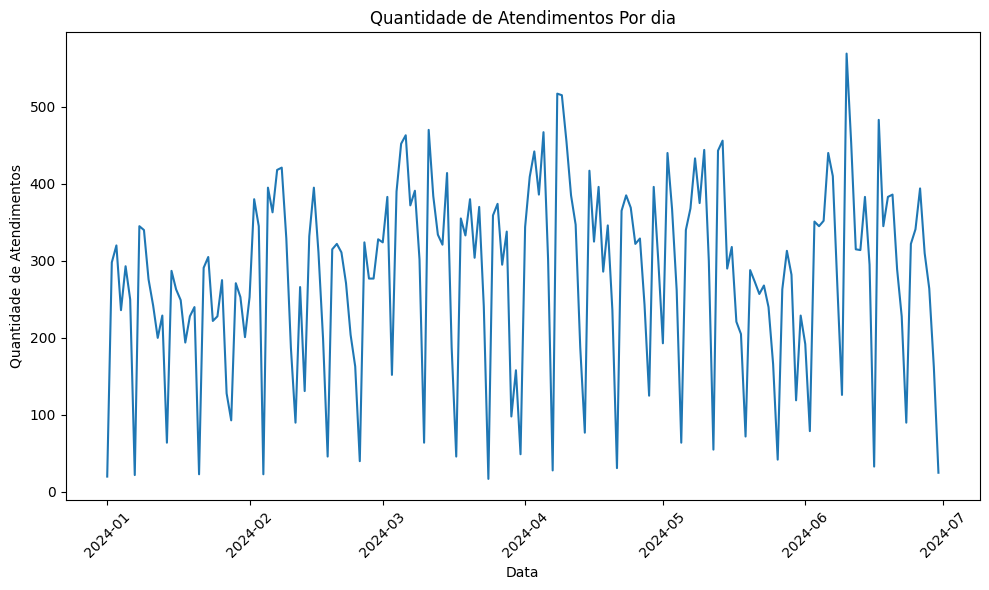

In [ ]:
# Análise Exploratória dos Dados

plt.figure(figsize=(10, 6))
sns.lineplot(x=Quantidade_Atendimentos.index, y=Quantidade_Atendimentos.values)
plt.xlabel('Data')
plt.ylabel('Quantidade de Atendimentos')
plt.title('Quantidade de Atendimentos Por dia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(20)

In [ ]:
# Atendimentos por dia da semana
atendimentos_por_dia_semana = atendimento.groupby(atendimento['Dia_Semana']).size()

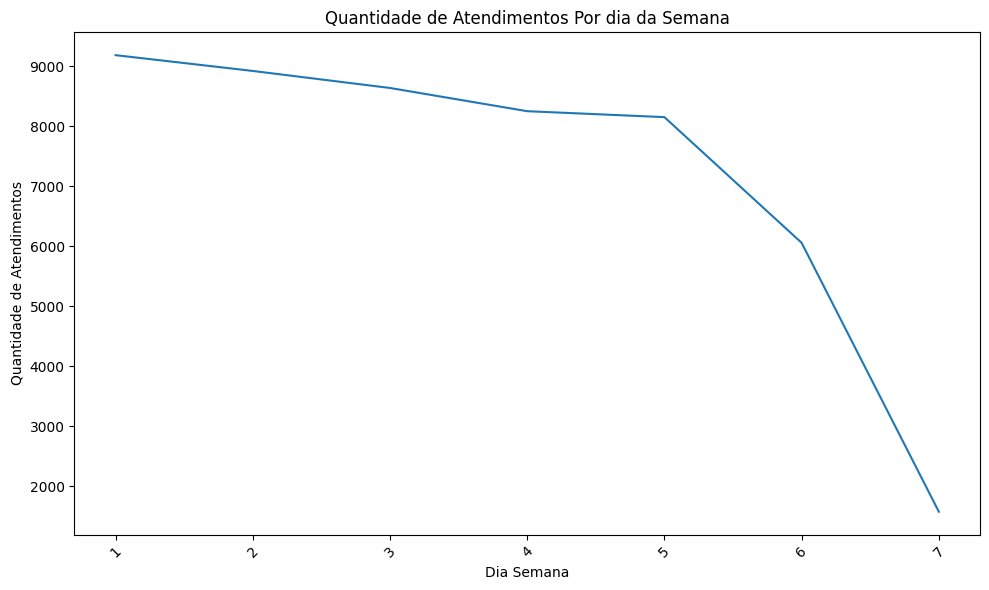

In [ ]:
# Análise Exploratória dos Dados

plt.figure(figsize=(10, 6))
sns.lineplot(x=atendimentos_por_dia_semana.index, y=atendimentos_por_dia_semana.values)
plt.xlabel('Dia Semana')
plt.ylabel('Quantidade de Atendimentos')
plt.title('Quantidade de Atendimentos Por dia da Semana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(20)

In [ ]:
# Atendimentos por mês
atendimentos_por_mês = atendimento.groupby(atendimento['Mês']).size()

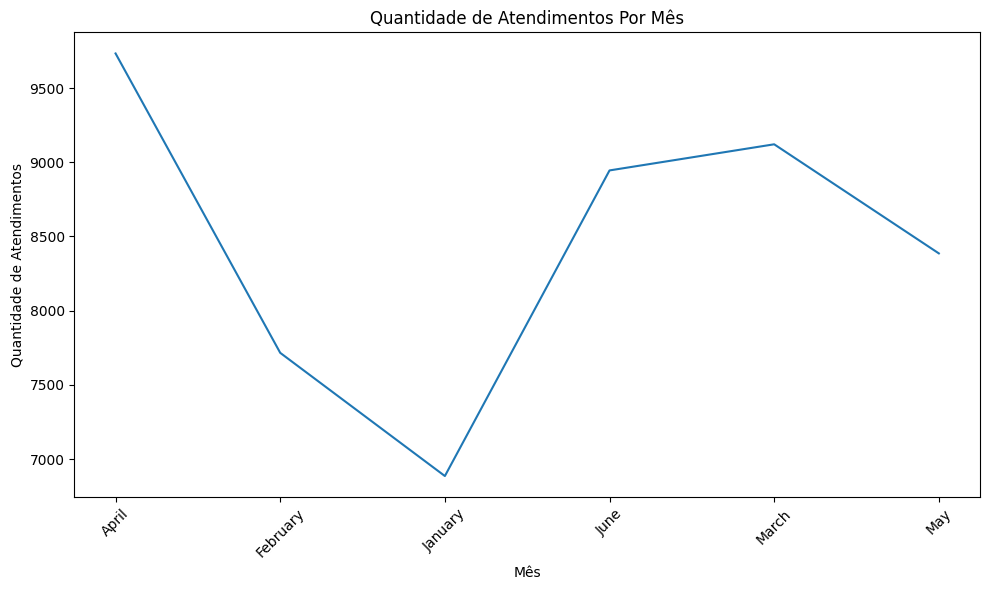

In [ ]:
# Análise Exploratória dos Dados

plt.figure(figsize=(10, 6))
sns.lineplot(x=atendimentos_por_mês.index, y=atendimentos_por_mês.values)
plt.xlabel('Mês')
plt.ylabel('Quantidade de Atendimentos')
plt.title('Quantidade de Atendimentos Por Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(20)

In [ ]:
coluna_nume = atendimento.select_dtypes(include=['number'])

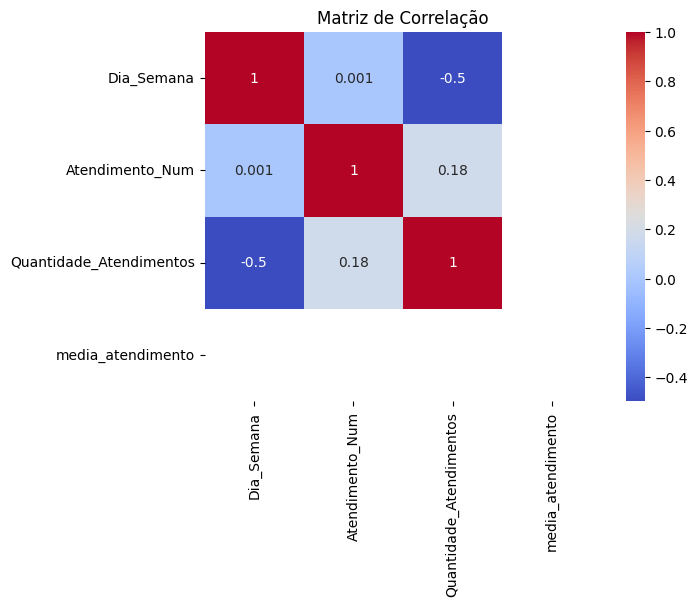

In [ ]:
# Calculando a matriz de correlação, usando como referência a coluna de contagem de atendimentos para criação da Matriz correlação.

corr_matrix = coluna_nume.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Modelagem da previsão
# Selecionar as features relevantes para a previsão

features = ['Mês', 'Dia_Semana']
X = atendimento[features]
y = atendimento['media_atendimento']

In [ ]:
# Converte o mês para uma representação numérica
X = pd.get_dummies(X, columns=['Mês'])

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinar um modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

RMSE: 5.684341886080802e-14


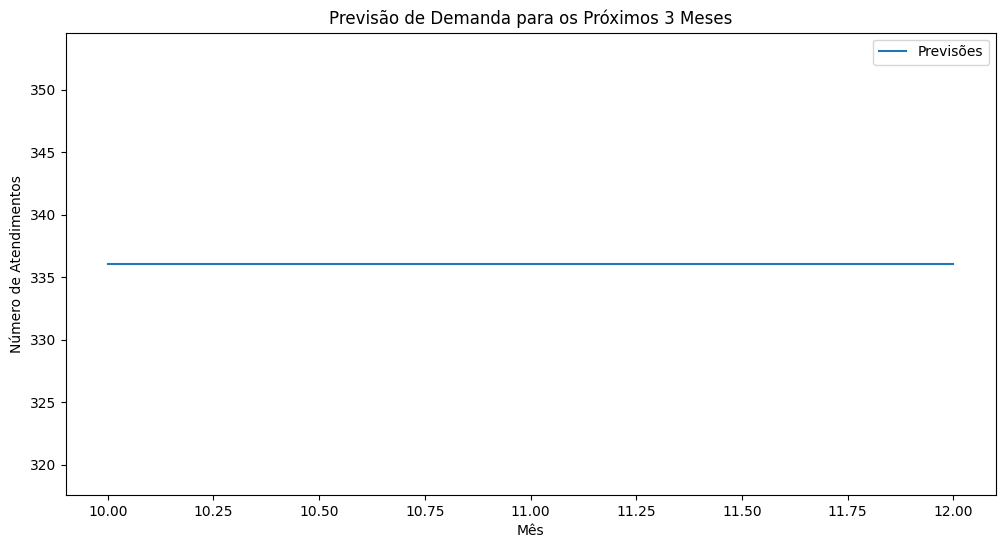

Previsão para o mês 10: 336 ligações
Previsão para o mês 11: 336 ligações
Previsão para o mês 12: 336 ligações


In [ ]:
# Fazer previsões para os próximos 3 meses

# Criar um DataFrame com as features dos próximos 3 meses

proximos_meses = pd.DataFrame({
    'Mes': [8, 9, 10],
    'Dia_Semana': [2, 3, 4]
})

# Aplicar one-hot encoding à coluna 'Mes'
proximos_meses = pd.get_dummies(proximos_meses, columns=['Mes'])

# Garante que próximos_meses tenha todas as colunas que o modelo espera

# Adiciona colunas com valor 0 para as colunas ausentes
for col in X_train.columns:
    if col not in proximos_meses.columns:
        proximos_meses[col] = 0

# Reordena as colunas para que correspondam à ordem do modelo
proximos_meses = proximos_meses[X_train.columns]

previsoes = model.predict(proximos_meses)

# Avaliação do modelo

# Calcular o erro médio quadrático (RMSE) nos dados de teste

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Visualizar as previsões para os próximos 3 meses

plt.figure(figsize=(12, 6))
plt.plot(range(10, 13), previsoes, label='Previsões') # Corrigido para usar range(10, 13)
plt.title('Previsão de Demanda para os Próximos 3 Meses')
plt.xlabel('Mês')
plt.ylabel('Número de Atendimentos')
plt.legend()
plt.show()

# Resultados e Interpretação

# Imprimir as previsões para os próximos 3 meses
for i, mes in enumerate(range(10, 13)):
    print(f'Previsão para o mês {mes}: {int(previsoes[i])} ligações')

**Conclusão**

Análise Preditiva de Demanda: Resultados e Recomendações

Foi utilizado a regressão linear para prever a demanda futura de atendimentos. Ao avaliar os resultados, concluí-se:

Baixo RMSE:
O RMSE (Root Mean Square Error) está próximo de zero, indicando que nossas previsões estão altamente precisas em relação aos valores reais.
Isso é uma excelente notícia, pois sugere que o modelo está capturando bem os padrões nos dados.

Padrões de Sazonalidade:
Observamos picos de atendimento nos meses de março, abril e junho.
Além disso, identificamos que os dias de maior demanda são segunda, terça e quarta-feira.

Recomendação Estratégica:

Com base nas previsões e na análise, recomendamos cautela quanto à contratação de mais agentes de atendimento.
Sugere-se realizar novos testes e uma análise mais detalhada para confirmar que o leve aumento na demanda não exigirá expansão da equipe.
Essa abordagem visa evitar custos desnecessários com mão de obra e manter a eficiência operacional da empresa.